In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import math

## Analytical plots

In [ ]:
def T(x, t):
  alpha = 6e-5
  t1 = 60*x
  t2 = 100*np.sin(math.pi*x)
  t3 = np.exp(-alpha*math.pi*math.pi*t)

  return t1 + t2*t3

Text(0, 0.5, 'T')

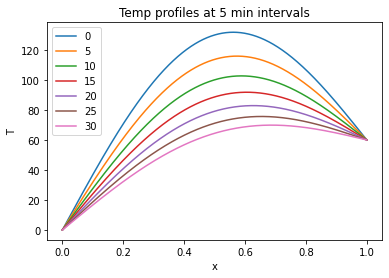

In [ ]:
x = np.linspace(0, 1, 1000)
t_array = []
legend = []
for t in range(0, 35, 5):
  t_array.append(T(x, t*60))
  legend.append(str(t))

for time in t_array:
  plt.plot(x, time)
plt.legend(legend)
plt.title("Temp profiles at 5 min intervals")
plt.xlabel("x")
plt.ylabel("T")

Text(0, 0.5, 'T')

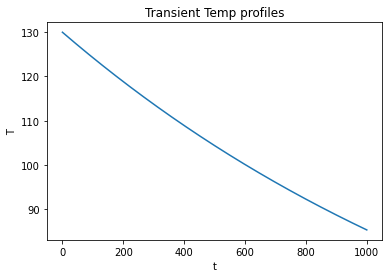

In [ ]:
t = np.linspace(0, 1000, 5000)
transient_T = T(0.5, t)
plt.plot(t, transient_T)
plt.title("Transient Temp profiles")
plt.xlabel("t")
plt.ylabel("T")

## Numerical Solutions

In [ ]:
L = 1.0   # thickness of wall (m)
T_left = 0.0   # temperature at left boundary (C)
T_right = 60.0   # temperature at right boundary (C)
alpha = 6.0e-5   # diffusivity of wall material (m^2/s)
dx1 = 0.01   # spatial step size 1 (m)

In [ ]:
def dt_fun(d, dx):
  return d*dx*dx/alpha

In [ ]:
def FTCS(d, dx1):
  dt = dt_fun(d, dx1)   # time step size (s)
  t_final = 3600  # final time (s)
  n1 = int(L/dx1) + 1
  m = int(t_final/dt)
  print(m, n1)

  T = np.zeros((n1, m))
  x = np.linspace(0, L, n1)
  T[:, 0] = 60*x + 100*np.sin(np.pi*x)
  T[0, :] = T_left
  T[-1, :] = T_right

  for j in range(m-1):
    for i in range(1, n1-1):
        T[i, j+1] = T[i, j] + d*(T[i+1, j] - 2*T[i, j] + T[i-1, j])

  return T, dt

In [ ]:
T_i, dt_i = FTCS(d = 0.6, dx1)

SyntaxError: ignored

In [ ]:
T_i[:, 0]

In [ ]:
dt_i

In [ ]:
t_array = []
legend = []
for t in range(0, 35, 5):
  legend.append(t)
  t_array.append(t)

x = np.linspace(0, 1, 101)
for time in t_array:
  index = int(time*60/dt_i)
  plt.plot(x, T_i[:, index])
plt.legend([str(c) for c in legend])
plt.xlabel('Thickness (m)')
plt.ylabel('Temperature (C)')
plt.title('Part i - Numerical Temperature Profiles in steps of 5 min')
plt.show()

In [ ]:
T_ii, dt_ii = FTCS(0.4, dx1)

In [ ]:
t_array = []
legend = []
for t in range(0, 35, 5):
  legend.append(t)
  t_array.append(t)

for time in t_array:
  index = int(time*60/dt_ii)
  plt.plot(x, T_ii[:, index])
plt.legend([str(c) for c in legend])
plt.xlabel('Thickness (m)')
plt.ylabel('Temperature (C)')
plt.title('Part ii - Numerical Temperature Profiles in steps of 5 min')
plt.show()

In [ ]:
t = np.linspace(0, 1000, 53)
transient_T = T_ii[0 + int(11*0.5), :]
plt.plot(t, transient_T)
plt.title("Transient Temp profiles - Part ii")
plt.xlabel("t")
plt.ylabel("T")

In [ ]:
t = np.linspace(0, 1000, 36)
transient_T = T_i[0 + int(11*0.5), :]
plt.plot(t, transient_T)
plt.title("Transient Temp profiles - Part i")
plt.xlabel("t")
plt.ylabel("T")

## BTCS

In [ ]:
dx1 = 0.01
d = 0.6
dt = dt_fun(d, dx1)   # time step size (s)
t_final = 3600  
nx = int(L/dx1) + 1
nt = int(t_final/dt)
print("nx ", nx, " nt ", nt)
alpha = 6e-5

nx  101  nt  3600


In [ ]:
def initial_condition_t0(x):
  return 60 * x + 100 * np.sin(np.pi * x)

In [ ]:
U = np.zeros((nt, nx))
x = np.linspace(0, 1, nx)
for index, xi in enumerate(x):
  U[0, index] = initial_condition_t0(xi)
U[:, 0] = 0
U[:, -1] = 60

In [ ]:
def BTCS(d, nx, nt, U, x):
  A = np.diag((1 + 2 * d) * np.ones(nx-2)) - d * np.diag(np.ones(nx - 3), 1) - d * np.diag(np.ones(nx - 3), -1)
  A_inv = np.linalg.inv(A) 
  for time_step in range(1, nt):
    lower = U[time_step-1, 1:-1]
    ep1, ep2 = U[time_step, 0], U[time_step, -1]
    b = np.zeros(nx-2)
    b[0] += ep1*d
    b[-1] += ep2*d
    rhs = lower + b
    
    current = np.matmul(A_inv, rhs)
    U[time_step, 1:-1] = current

  return U

In [ ]:
U = BTCS(0.6, nx, nt, U, x)

In [ ]:
def plot_5(U, x, dt):
  legend = []
  for i in range(0, 35, 5):
    # print(i)
    index = int(i*60/dt)
    print(i, index)
    y = U[index]
    legend.append(str(i))
    plt.plot(x, y)
  print(legend)
  plt.legend(legend)

0 0
5 300
10 600
15 900
20 1200
25 1500
30 1800
['0', '5', '10', '15', '20', '25', '30']


Text(0, 0.5, 'T')

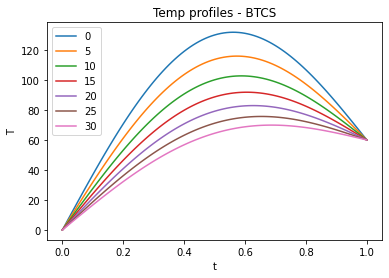

In [ ]:
plot_5(U, x, dt)
plt.title("Temp profiles - BTCS")
plt.xlabel("t")
plt.ylabel("T")

In [ ]:
dx1, dt, nx, nt

(0.01, 1.0, 101, 3600)

In [ ]:
mid_plane_index = int(0.5*nx)
mid_plane_index

50

In [ ]:
U[:, 50].shape

(3600,)

In [ ]:
t = np.linspace(1, 3600, 3600)

Text(0, 0.5, 'T')

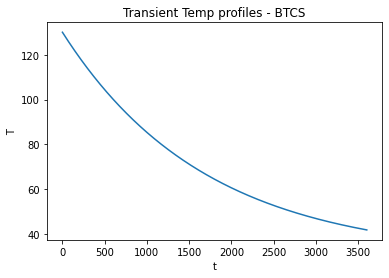

In [ ]:
plt.plot(t, U[:, 50])
plt.title("Transient Temp profiles - BTCS")
plt.xlabel("t")
plt.ylabel("T")